<a href="https://colab.research.google.com/github/prog815/learnTensorFlow/blob/master/%D0%98%D0%BD%D0%B4%D0%B8%D0%B2%D0%B8%D0%B4%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D1%85%D0%BE%D0%B6%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Енин А.В.

Оренбург - 2020

21.08.2020

Тренируемся.

https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough

In [1]:
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.3.0'

In [5]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

In [7]:
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),origin=train_dataset_url)
train_dataset_fp

8192/2194 [================================================================================================================] - 0s 0us/step


'/root/.keras/datasets/iris_training.csv'

In [8]:
! head {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0
4.4,3.2,1.3,0.2,0
5.4,3.4,1.5,0.4,0
6.9,3.1,5.1,2.3,2
6.7,3.1,4.4,1.4,1


In [9]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [10]:
feature_names = column_names[:-1]
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [11]:
label_name = column_names[-1]
label_name

'species'

In [12]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [13]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(train_dataset_fp,batch_size,column_names=column_names,label_name=label_name,num_epochs=1)
train_dataset 

<PrefetchDataset shapes: (OrderedDict([(sepal_length, (None,)), (sepal_width, (None,)), (petal_length, (None,)), (petal_width, (None,))]), (None,)), types: (OrderedDict([(sepal_length, tf.float32), (sepal_width, tf.float32), (petal_length, tf.float32), (petal_width, tf.float32)]), tf.int32)>

In [14]:
for features, labels in train_dataset:
    print(features)
    print(labels)
    break

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.4, 4.8, 4.9, 6.5, 6.7, 6.4, 5. , 4.6, 6.3, 6.6, 6.9, 5.4, 5.1,
       4.6, 5.5, 4.4, 4.8, 7.4, 6.3, 5.8, 6.7, 5.7, 5.1, 6. , 4.9, 6.1,
       5.1, 5.8, 6.9, 4.8, 6.8, 6.2], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.2, 3. , 3.1, 3. , 3. , 3.2, 3.6, 3.2, 2.7, 3. , 3.2, 3. , 3.8,
       3.4, 2.6, 3. , 3.1, 2.8, 3.3, 4. , 3.3, 2.8, 3.7, 3. , 3.1, 2.8,
       3.5, 2.7, 3.1, 3. , 2.8, 3.4], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.3, 1.4, 1.5, 5.8, 5. , 4.5, 1.4, 1.4, 4.9, 4.4, 5.7, 4.5, 1.9,
       1.4, 4.4, 1.3, 1.6, 6.1, 6. , 1.2, 5.7, 4.1, 1.5, 4.8, 1.5, 4.7,
       1.4, 4.1, 5.1, 1.4, 4.8, 5.4], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.3, 0.1, 0.1, 2.2, 1.7, 1.5, 0.2, 0.2, 1.8, 1.4, 2.3, 1.5, 0.4,
       0.3, 1.2, 0.2, 0.2, 1.9, 2.5, 0.2, 2.1, 1.3, 0.4, 1.8,

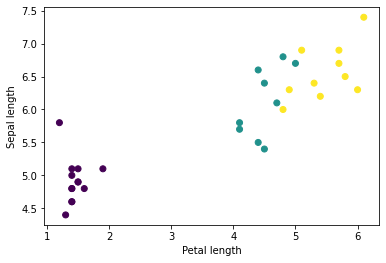

In [17]:
plt.scatter(features['petal_length'],features['sepal_length'],c=labels)
plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [18]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [19]:
train_dataset = train_dataset.map(pack_features_vector)

In [20]:
for features, labels in train_dataset:
    print(features[:5])
    break

tf.Tensor(
[[7.  3.2 4.7 1.4]
 [5.8 2.8 5.1 2.4]
 [5.  3.5 1.6 0.6]
 [6.3 2.3 4.4 1.3]
 [5.  3.5 1.3 0.3]], shape=(5, 4), dtype=float32)


In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation=tf.nn.relu,input_shape=(4,)),
    tf.keras.layers.Dense(10,activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [23]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 2.1358564 , -1.698     , -0.5833705 ],
       [ 2.2884855 , -1.275424  , -0.6210908 ],
       [ 1.3688788 , -2.2020192 , -0.6285734 ],
       [ 1.9439534 , -1.1539475 , -0.50085783],
       [ 1.2997092 , -2.2262006 , -0.6400675 ]], dtype=float32)>

In [28]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.9194964 , 0.01988508, 0.06061845],
       [0.9235089 , 0.02616103, 0.05033014],
       [0.85924596, 0.02417109, 0.11658294],
       [0.8834809 , 0.03988374, 0.07663534],
       [0.8523979 , 0.02508183, 0.12252031]], dtype=float32)>

In [29]:
tf.argmax(predictions,axis=1)

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [31]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_object 

In [32]:
def loss(model,x,y,training):
    y_ = model(x,training = training)
    return loss_object(y_true=y,y_pred=y_)

l = loss(model,features,labels,training=False)
l

<tf.Tensor: shape=(), dtype=float32, numpy=2.1492174>

In [33]:
def grad(model,inputs,targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model,inputs,targets,training=True)
    return loss_value, tape.gradient(loss_value,model.trainable_variables)

In [34]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [35]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 2.149217367172241
Step: 1,         Loss: 1.6890227794647217


In [36]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.429, Accuracy: 36.667%
Epoch 050: Loss: 0.444, Accuracy: 81.667%
Epoch 100: Loss: 0.303, Accuracy: 95.833%
Epoch 150: Loss: 0.209, Accuracy: 95.833%
Epoch 200: Loss: 0.157, Accuracy: 96.667%


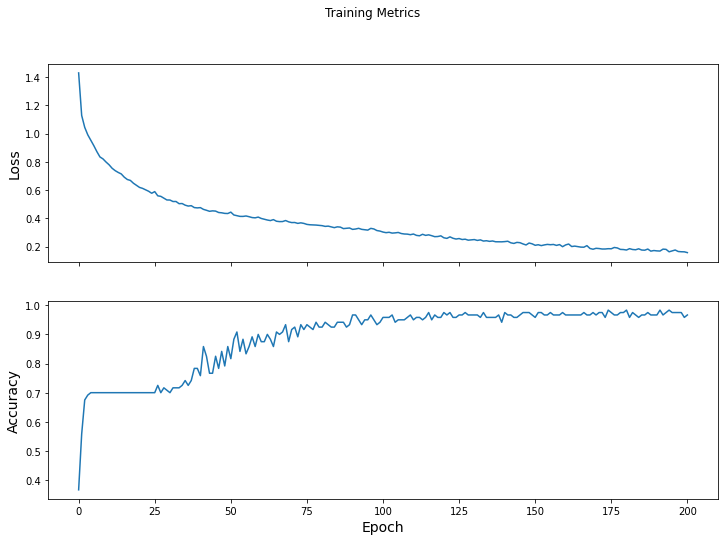

In [37]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [38]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [39]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [40]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [41]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>